### Logistic regression

Klassifikation - vi behöver veta om svaret är ja eller nej (har covid?, har hjärtsjukdom?)   (???)

Supervised lerning - regression ELLER klassifikation




### Läser in datasetet till programmet

In [39]:
import pandas as pd
import numpy as np
import seaborn as sns

df = pd.read_csv("../../data/Default.csv")

df.head()


,default,student,balance,income
0,No,No,729.526495,44361.625074
1,No,Yes,817.180407,12106.134700
2,No,No,1073.549164,31767.138947
3,No,No,529.250605,35704.493935
4,No,No,785.655883,38463.495879


In [40]:
print(df.describe().T)
print(df.info())

           count          mean           std         min           25%  \
balance  10000.0    835.374886    483.714985    0.000000    481.731105   
income   10000.0  33516.981876  13336.639563  771.967729  21340.462903   

                  50%           75%           max  
balance    823.636973   1166.308386   2654.322576  
income   34552.644802  43807.729272  73554.233495  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   default  10000 non-null  object 
 1   student  10000 non-null  object 
 2   balance  10000 non-null  float64
 3   income   10000 non-null  float64
dtypes: float64(2), object(2)
memory usage: 312.6+ KB
None


In [41]:
df["default"].value_counts() # unbalanced dataset

default
No     9667
Yes     333
Name: count, dtype: int64

<Axes: xlabel='balance', ylabel='income'>

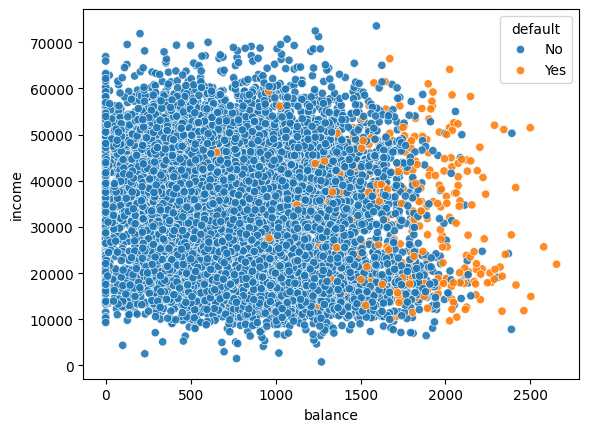

In [42]:
import seaborn as sns

sns.scatterplot(data = df, x = "balance", y = "income", hue = "default", alpha = 0.9)

<Axes: xlabel='balance', ylabel='income'>

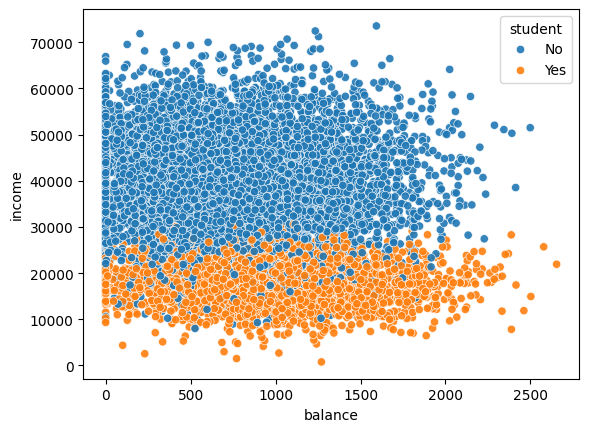

In [43]:
sns.scatterplot(data = df, x = "balance", y = "income", hue = "student", alpha = 0.9)

<Axes: xlabel='default', ylabel='income'>

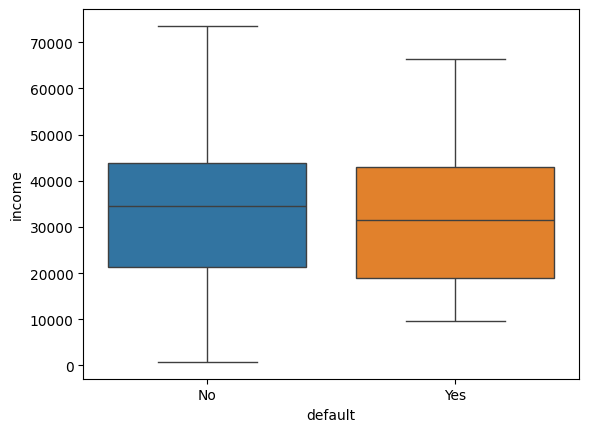

In [44]:
sns.boxplot(data = df, x = "default", y = "income", hue = "default")

<Axes: xlabel='default', ylabel='balance'>

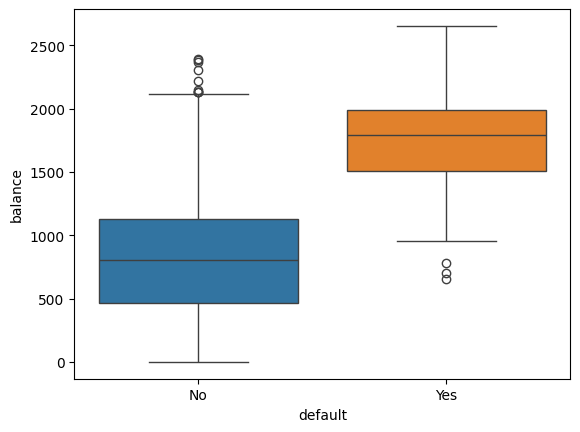

In [45]:
sns.boxplot(data = df, x = "default", y = "balance", hue = "default")

## Dummy encoding

In [46]:
pd.get_dummies(df).head() #One-hot encoding - utvidgas till datasetets respektive kategori

,balance,income,default_No,default_Yes,student_No,student_Yes
0,729.526495,44361.625074,True,False,True,False
1,817.180407,12106.134700,True,False,False,True
2,1073.549164,31767.138947,True,False,True,False
3,529.250605,35704.493935,True,False,True,False
4,785.655883,38463.495879,True,False,True,False


In [47]:
#dummie encoding

pd.get_dummies(df, drop_first= True)

,balance,income,default_Yes,student_Yes
0,729.526495,44361.625074,False,False
1,817.180407,12106.134700,False,True
2,1073.549164,31767.138947,False,False
3,529.250605,35704.493935,False,False
4,785.655883,38463.495879,False,False
...,...,...,...,...
9995,711.555020,52992.378914,False,False
9996,757.962918,19660.721768,False,False
9997,845.411989,58636.156984,False,False
9998,1569.009053,36669.112365,False,False


In [48]:
pd.get_dummies(df, drop_first= True)*1

,balance,income,default_Yes,student_Yes
0,729.526495,44361.625074,0,0
1,817.180407,12106.134700,0,1
2,1073.549164,31767.138947,0,0
3,529.250605,35704.493935,0,0
4,785.655883,38463.495879,0,0
...,...,...,...,...
9995,711.555020,52992.378914,0,0
9996,757.962918,19660.721768,0,0
9997,845.411989,58636.156984,0,0
9998,1569.009053,36669.112365,0,0


In [49]:
df_dummies = pd.get_dummies(df, drop_first= True)*1
df_dummies.head()

,balance,income,default_Yes,student_Yes
0,729.526495,44361.625074,0,0
1,817.180407,12106.134700,0,1
2,1073.549164,31767.138947,0,0
3,529.250605,35704.493935,0,0
4,785.655883,38463.495879,0,0


### Logistic regression

In [50]:
#feature matrix an label vector

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X, y = df_dummies.drop("default_Yes", axis = 1), df_dummies["default_Yes"]
X.head()

,balance,income,student_Yes
0,729.526495,44361.625074,0
1,817.180407,12106.134700,1
2,1073.549164,31767.138947,0
3,529.250605,35704.493935,0
4,785.655883,38463.495879,0


In [51]:

y.head()

0    0
1    0
2    0
3    0
4    0
Name: default_Yes, dtype: int64

In [52]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33 #, random_state=42
)

X_train.shape, X_test.shape

((6700, 3), (3300, 3))

In [53]:

print(f"Proportion default in training data: {y_train.sum()/len(X_train):.3f}")
print(f"Proportion default in test data: {y_test.sum()/len(X_test):.3f}")
print(f"Proportion default in the whole datase: {y.sum()/len(X):.3f}")

Proportion default in training data: 0.033
Proportion default in test data: 0.033
Proportion default in the whole datase: 0.033


### Scale dataset

In [54]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(X_train)
scaled_X_train = scaler.transform(X_train)
scaled_X_test = scaler.transform(X_test)

print(scaled_X_train.mean(), scaled_X_train.std())
print(scaled_X_test.mean(), scaled_X_test.std())

-1.6066749920545549e-16 1.0
-0.00351277292815067 0.9895281641028973


In [55]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

model.fit(scaled_X_train, y_train) #kolla upp --> penalty, y_train = facit!

model.coef_



array([[ 2.85174431,  0.04787334, -0.23425552]])

In [56]:
X_train.shape

(6700, 3)

In [57]:
model.intercept_

array([-6.31149572])

### Prediction - test classify 2 samples

In [58]:
X_train.head(2)

,balance,income,student_Yes
9861,317.855558,63021.747946,0
3283,330.074882,45757.375576,0


In [59]:

test_samples = pd.DataFrame(
    {"balance":[1500 , 1500], "income": [40000, 40000], "student_Yes":[1, 0]}
)

test_samples

,balance,income,student_Yes
0,1500,40000,1
1,1500,40000,0


In [60]:
scaled_test_samples = scaler.transform(test_samples)
scaled_test_samples

array([[ 1.36659666,  0.48433749,  1.54452202],
       [ 1.36659666,  0.48433749, -0.6474495 ]])

In [61]:
model.predict_proba(scaled_test_samples)

array([[0.94007903, 0.05992097],
       [0.90373714, 0.09626286]])

In [62]:
#np.argmax(y_pred_samples)
model.predict(scaled_test_samples)

array([0, 0])

### Predict on all testdata and evaluate

In [65]:
y_pred = model.predict(scaled_X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], shape=(3300,))

In [66]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

cm = confusion_matrix(y_test, y_pred)

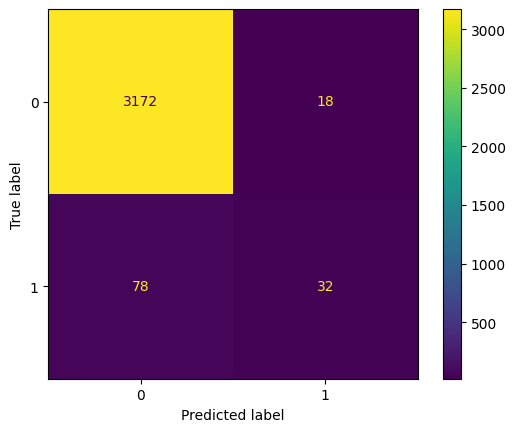

In [67]:
ConfusionMatrixDisplay(cm).plot()

### Räkna ut accuracy

In [71]:
TP = 32
TN = 3172
FP = 18
FN = 78

accuracy = (TP  + TN)/(TP + TN + FP + FN)
precision = TP/(TP+FP)
recall = TP/(TP+FN)

print(f"{accuracy:.3f}")
print(f"{precision:.3f}")
print(f"{recall:.3f}")


0.971
0.640
0.291


In [72]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      3190
           1       0.64      0.29      0.40       110

    accuracy                           0.97      3300
   macro avg       0.81      0.64      0.69      3300
weighted avg       0.96      0.97      0.97      3300

